In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import cedar_data
reload(cedar_data)
from cedar_data import *

%matplotlib inline

In [2]:
A_msmts = ["A" + str(i+1) for i in range(6)]

[ 0.20350406  6.90631663]
[ 0.25613844  4.5519732 ]
[ 0.31790309 -1.57498254]
[ 0.29279066 -1.02897264]
[ 0.45823729 -7.18389207]
[  0.67456949 -11.88926364]


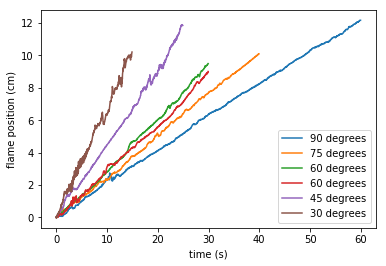

In [3]:
flame_velocities = {}

for m in A_msmts:
    data = np.load(os.path.join("data", m + ".npz"))
    t = data["flame_tracked_data"][:,0] / data["fps"]
    x = data["flame_tracked_data"][:,4]
    valid_points = (t > valid_time_ranges[m][0]) & (t < valid_time_ranges[m][1])
    start_point = np.flatnonzero(valid_points)[0]
    
    plt.plot(t[valid_points] - t[start_point], x[valid_points]-x[start_point], label="%.0f degrees" % angles[m])
    fr = np.polyfit(t[valid_points], x[valid_points], 1)
    flame_velocities[m] = fr[0]
    print(fr)

plt.legend()
plt.xlabel("time (s)")
plt.ylabel("flame position (cm)")
plt.savefig("plots/flame_traces.png", dpi=300)

In [4]:
repr(flame_velocities)

"{'A1': 0.20350405996497042, 'A2': 0.25613843857418356, 'A3': 0.3179030914422355, 'A4': 0.2927906576466402, 'A5': 0.45823729028041699, 'A6': 0.67456949486780682}"

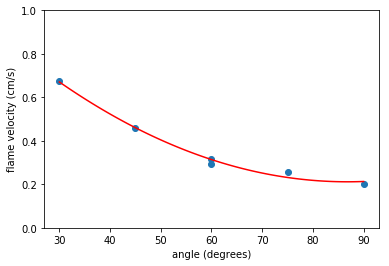

In [5]:
angs = []
vels = []

for m in A_msmts:
    angs.append(angles[m])
    vels.append(flame_velocities[m])
    
angs = np.array(angs)
vels = np.array(vels)

fr = np.polyfit(angs, vels, 2)
fp = np.poly1d(fr)

fr_exp = np.polyfit(angs, np.log(vels), 1)
fp_exp = lambda x: np.exp(np.poly1d(fr_exp)(x))

plt.scatter(angs, vels)
ang_lp = np.linspace(30, 90, 100)
plt.plot(ang_lp, fp(ang_lp), color="r")
#plt.plot(ang_lp, fp_exp(ang_lp), color="g")
plt.xlabel("angle (degrees)")
plt.ylabel("flame velocity (cm/s)")
plt.ylim(0,1)

vel_fit_vals = fp(ang_lp)

plt.savefig("plots/flame_velocities.png", dpi=300)

[ 0.17852154]
[ 0.41151763]
[ 0.4939817]
[ 0.4518372]
[ 0.57490772]
[ 0.72366522]


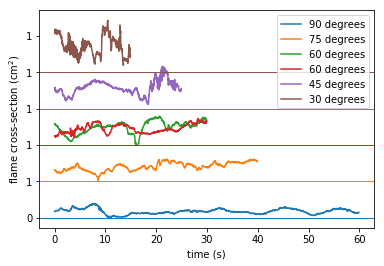

In [6]:
flame_velocities = {}

avg_flame_sizes = {}

offsets = {
    "A1": 0,
    "A2": 1,
    "A3": 2,
    "A4": 2,
    "A5": 3,
    "A6": 4,
}
for m in A_msmts:
    data = np.load(os.path.join("data", m + ".npz"))
    t = data["flame_tracked_data"][:,0] / data["fps"]
    x = data["flame_tracked_data"][:,5]
    valid_points = (t > valid_time_ranges[m][0]) & (t < valid_time_ranges[m][1])
    start_point = np.flatnonzero(valid_points)[0]
    
    avg_flame_sizes[m] = np.mean(x[valid_points])
    
    p, = plt.plot(t[valid_points] - t[start_point], x[valid_points] + offsets[m], label="%.0f degrees" % angles[m])
    plt.axhline(y=offsets[m], color=p.get_color(), linewidth=1)
    fr = np.polyfit(t[valid_points], x[valid_points], 0.5)
    flame_velocities[m] = fr[0]
    print(fr)

plt.legend()
plt.xlabel("time (s)")
plt.ylabel("flame cross-section (cm$^2$)")
ax = plt.gca()
ax.set_yticklabels([0, 0, 1, 1, 1, 1, 1])

plt.savefig("plots/flame_size_trace.png", dpi=300)

In [7]:
repr(avg_flame_sizes)

"{'A1': 0.17852154073069088, 'A2': 0.41151763096332444, 'A3': 0.49398170378084438, 'A4': 0.45183719977299375, 'A5': 0.57490772344488039, 'A6': 0.72366521729190791}"

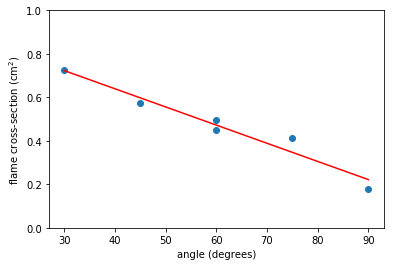

In [8]:
angs = []
sizes = []

for m in A_msmts:
    angs.append(angles[m])
    sizes.append(avg_flame_sizes[m])
    
angs = np.array(angs)
sizes = np.array(sizes)

fr = np.polyfit(angs, sizes, 1)
fp = np.poly1d(fr)

# fr_exp = np.polyfit(angs, np.log(vels), 1)
# fp_exp = lambda x: np.exp(np.poly1d(fr_exp)(x))

plt.scatter(angs, sizes)
ang_lp = np.linspace(30, 90, 100)
plt.plot(ang_lp, fp(ang_lp), color="r")
#plt.plot(ang_lp, fp_exp(ang_lp), color="g")
plt.xlabel("angle (degrees)")
plt.ylabel("flame cross-section (cm$^2$)")
plt.ylim(0,1)

size_fit_vals = fp(ang_lp)

plt.savefig("plots/flame_sizes.png", dpi=300)

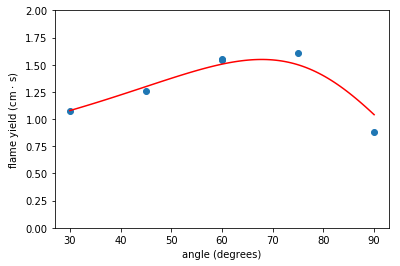

In [9]:
fom = sizes/vels

fit_fom = size_fit_vals/vel_fit_vals

plt.scatter(angs, fom)
plt.plot(ang_lp, fit_fom, color="r")
plt.ylim(0,2)
plt.xlabel("angle (degrees)")
plt.ylabel("flame yield (cm $\cdot$ s)")

plt.savefig("plots/flame_yield.png", dpi=300)

In [10]:
max_idx = np.argmax(fit_fom)
ang_lp[max_idx]

67.575757575757578